In [48]:
import pandas as pd
import functions as f
from scipy.signal import welch
import numpy as np
import matplotlib.pyplot as plt

plt.rc("font",size=14)

path_to_csvs   = "C:\\Users\\krydalch\\Desktop\\MetMastData\\TTU tall tower\\"

In [1]:
times[per][0]

NameError: name 'times' is not defined

In [68]:
master_df.keys()

MultiIndex(levels=[[0.9, 2.4, 4.0, 10.1, 16.8, 47.2, 116.4, 158.2, 200.0], ['Theta', 'U', 'V', 'W']],
           codes=[[0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6, 6, 7, 7, 7, 7, 8, 8, 8, 8], [0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3]])

In [4]:
heights = [0.9, 2.4, 4.0, 10.1, 16.8, 47.2, 116.4, 158.2, 200.0]
times ={'Jet': ['05:30:00','06:00:00','10:00:00','10:30:00','12:00:00','14:10:00'], 'Mixed': ['02:00:00', '03:00:00', '04:00:00']} 

freq = {}
P = {}
df = {}

for per in times:
    now = times[per]
    print(per)
    print(now)
    for i,time in enumerate(now):
        print(i)
        
        now_pd = pd.Timestamp(time)
        end_pd = now_pd + pd.Timedelta(minutes=30)
        end_pd = str(end_pd)
        time_end = end_pd.split(' ')[1]
        
        master_df = f.get_sonic_met_dat(path_to_csvs, time, time_end)
        series = master_df[116.4]['U']
        dt = np.unique(np.round(np.diff((series.index - series.index[0]).total_seconds()),2))[0]
        fs = 1/dt
        timeseries = series.values
        
        if per == 'Mixed':
            i = i + 6
        
        print(i)
        [freq[i],P[i]]=welch(timeseries,fs=fs)
        
        print(i,time)
        
    

Jet
['05:30:00', '06:00:00', '10:00:00', '10:30:00', '12:00:00', '14:10:00']
0
------------------
Starting Master Function
group 1 out of 4


KeyboardInterrupt: 

0
#94a3ff
1
#94a3ff
2
#94a3ff
3
#94a3ff
4
#94a3ff
5
#94a3ff
6
7
8
9
10


Text(0, 0.5, 'PSD')

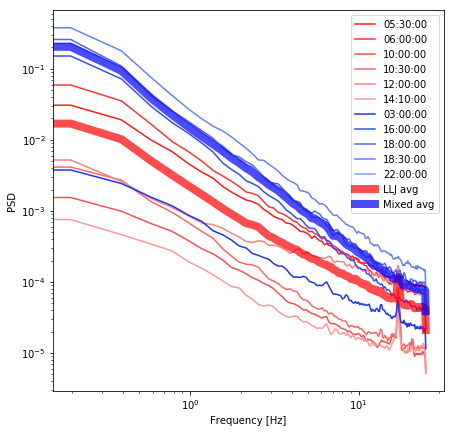

In [67]:
fig = plt.figure(figsize=(7,7))
ax  = fig.add_subplot(111)

P_total_LLJ = 0
P_total_mixed = 0
a = 0
b = 0

color_add_jet = [0.0,0.1,0.1]
color_jet = [1.0,0.0,0.0]

color_add_mix = [0.1,0.1,0.0]
color_mixed = [0.0,0.1,1.0]

for i in range(0,11):
    print(i)
    if i < 6:
        name = times['Jet'][i]
        color_jet = [sum(x) for x in zip(color_jet, color_add_jet)]
        print(color)
        P_total_LLJ =  P_total_LLJ + P[i]
        a = 1 + a
        ax.loglog(freq[i],P[i],color=color_jet,label = name)
    else:
        name = times['Mixed'][i - 5]
        color_mixed = [sum(x) for x in zip(color_mixed, color_add_mix)]
        P_total_mixed =  P_total_mixed + P[i]
        b = 1 + b
        ax.loglog(freq[i],P[i],color=color_mixed,label = name)

    

Pavg_LLJ = P_total_LLJ / a
Pavg_mixed = P_total_mixed / b 

ax.loglog(freq[i],Pavg_LLJ, 'r' ,label = 'LLJ avg',linewidth=8.0,alpha=0.7)
ax.loglog(freq[i],Pavg_mixed,'b',label = 'Mixed avg',linewidth=8.0,alpha=0.7)
    
ax.legend()
ax.set_xlabel("Frequency [Hz]")
ax.set_ylabel("PSD")

#fig.savefig("../PSD_avg.png",bbox_inches="tight",dpi=500)

# Investigate if spike occurs higher

In [8]:
master_df = f.get_sonic_met_dat(path_to_csvs, time, time_end)
master_df.head()

------------------
Starting Master Function
group 1 out of 4
group 2 out of 4
group 3 out of 4
group 4 out of 4
Creating Final DataFrame
DONE!
------------------


0.9                                  \
                                     Theta         U         V         W   
2017-02-17 05:30:00+00:00         3.087080  2.643981  0.142595  0.045074   
2017-02-17 05:30:00.020000+00:00  0.726885  2.700916  0.034267  0.063058   
2017-02-17 05:30:00.040000+00:00  1.307174  2.692350  0.061435  0.053650   
2017-02-17 05:30:00.060000+00:00  1.835351  2.671112  0.085593 -0.006060   
2017-02-17 05:30:00.080000+00:00  0.911406  2.671680  0.042502 -0.067239   

                                      2.4                                  \
                                      Theta         U         V         W   
2017-02-17 05:30:00+00:00          7.656678  3.135034  0.421460 -0.242970   
2017-02-17 05:30:00.020000+00:00   8.087385  3.139853  0.446162 -0.141646   
2017-02-17 05:30:00.040000+00:00  10.245789  2.963989  0.535752 -0.033731   
2017-02-17 05:30:00.060000+00:00  10.834292  2.979628  0.570243 -0.172172   
2017-02-17 05:30:00.080000+00:00  10.310467  2.991321  0.544180 -0.201903   

                                     4.0              ...     116.4            \
                                     Theta         U  ...         V         W   
2017-02-17 05:30:00+00:00         0.794114  2.902260  ...  1.198307  0.131986   
2017-02-17 05:30:00.020000+00:00  1.202964  2.902178  ...  1.193102  0.154531   
2017-02-17 05:30:00.040000+00:00  1.457940  2.875257  ...  1.006357  0.131893   
2017-02-17 05:30:00.060000+00:00 -0.022937  2.870605  ...  1.225026  0.059466   
2017-02-17 05:30:00.080000+00:00  0.333459  2.812479  ...  1.214980  0.084831   

                                     158.2                                 \
                                     Theta          U         V         W   
2017-02-17 05:30:00+00:00         3.038069  17.678256  0.938257 -0.043868   
2017-02-17 05:30:00.020000+00:00  2.773212  17.692226  0.857003 -0.045486   
2017-02-17 05:30:00.040000+00:00  2.979290  17.659851  0.919113  0.016917   
2017-02-17 05:30:00.060000+00:00  2.863840  17.786840  0.889789 -0.009802   
2017-02-17 05:30:00.080000+00:00  2.849558  17.744256  0.883224 -0.047796   

                                     200.0                                 
                                     Theta          U         V         W  
2017-02-17 05:30:00+00:00         1.373847  16.768724  0.402160 -0.084049  
2017-02-17 05:30:00.020000+00:00  1.484365  16.783631  0.434912 -0.094301  
2017-02-17 05:30:00.040000+00:00  1.540189  16.764260  0.450755 -0.042592  
2017-02-17 05:30:00.060000+00:00  1.453169  16.717028  0.424078 -0.050179  
2017-02-17 05:30:00.080000+00:00  1.533102  16.743860  0.448134 -0.051365  

[5 rows x 36 columns]

In [36]:
heights = [47.2, 116.4, 158.2, 200.0]
vel_comps = ['U','V','W']
times =['05:30:00','06:00:00','10:00:00','10:30:00','12:00:00','14:00:00']

freq = {}
P = {}
df = {}

for i,time in enumerate(times):
    now_pd = pd.Timestamp(time)
    end_pd = now_pd + pd.Timedelta(minutes=30)
    end_pd = str(end_pd)
    time_end = end_pd.split(' ')[1]

    master_df = f.get_sonic_met_dat(path_to_csvs, time, time_end)

    for b,h in enumerate(heights):
        for c,vel in enumerate(vel_comps):
            series = master_df[h][vel]
            dt = np.unique(np.round(np.diff((series.index - series.index[0]).total_seconds()),2))[0]
            fs = 1/dt
            timeseries = series.values
            
            [freq[str(vel)+str(h)+str(time)],P[str(vel)+str(h)+str(time)]]=welch(timeseries,fs=fs)

    print(i,time)
print('done')

------------------
Starting Master Function
group 1 out of 4
group 2 out of 4
group 3 out of 4
group 4 out of 4
Creating Final DataFrame
DONE!
------------------
0 05:30:00
------------------
Starting Master Function
group 1 out of 4
group 2 out of 4
group 3 out of 4
group 4 out of 4
Creating Final DataFrame
DONE!
------------------
1 06:00:00
------------------
Starting Master Function
group 1 out of 4
group 2 out of 4
group 3 out of 4
group 4 out of 4
Creating Final DataFrame
DONE!
------------------
2 10:00:00
------------------
Starting Master Function
group 1 out of 4
group 2 out of 4
group 3 out of 4
group 4 out of 4
Creating Final DataFrame
DONE!
------------------
3 10:30:00
------------------
Starting Master Function
group 1 out of 4
group 2 out of 4
group 3 out of 4
group 4 out of 4
Creating Final DataFrame
DONE!
------------------
4 12:00:00
------------------
Starting Master Function
group 1 out of 4
group 2 out of 4
group 3 out of 4
group 4 out of 4
Creating Final DataFram

In [37]:
freq.keys()

dict_keys(['U47.205:30:00', 'V47.205:30:00', 'W47.205:30:00', 'U116.405:30:00', 'V116.405:30:00', 'W116.405:30:00', 'U158.205:30:00', 'V158.205:30:00', 'W158.205:30:00', 'U200.005:30:00', 'V200.005:30:00', 'W200.005:30:00', 'U47.206:00:00', 'V47.206:00:00', 'W47.206:00:00', 'U116.406:00:00', 'V116.406:00:00', 'W116.406:00:00', 'U158.206:00:00', 'V158.206:00:00', 'W158.206:00:00', 'U200.006:00:00', 'V200.006:00:00', 'W200.006:00:00', 'U47.210:00:00', 'V47.210:00:00', 'W47.210:00:00', 'U116.410:00:00', 'V116.410:00:00', 'W116.410:00:00', 'U158.210:00:00', 'V158.210:00:00', 'W158.210:00:00', 'U200.010:00:00', 'V200.010:00:00', 'W200.010:00:00', 'U47.210:30:00', 'V47.210:30:00', 'W47.210:30:00', 'U116.410:30:00', 'V116.410:30:00', 'W116.410:30:00', 'U158.210:30:00', 'V158.210:30:00', 'W158.210:30:00', 'U200.010:30:00', 'V200.010:30:00', 'W200.010:30:00', 'U47.212:00:00', 'V47.212:00:00', 'W47.212:00:00', 'U116.412:00:00', 'V116.412:00:00', 'W116.412:00:00', 'U158.212:00:00', 'V158.212:00:0

In [47]:
h[6]

TypeError: 'float' object is not subscriptable

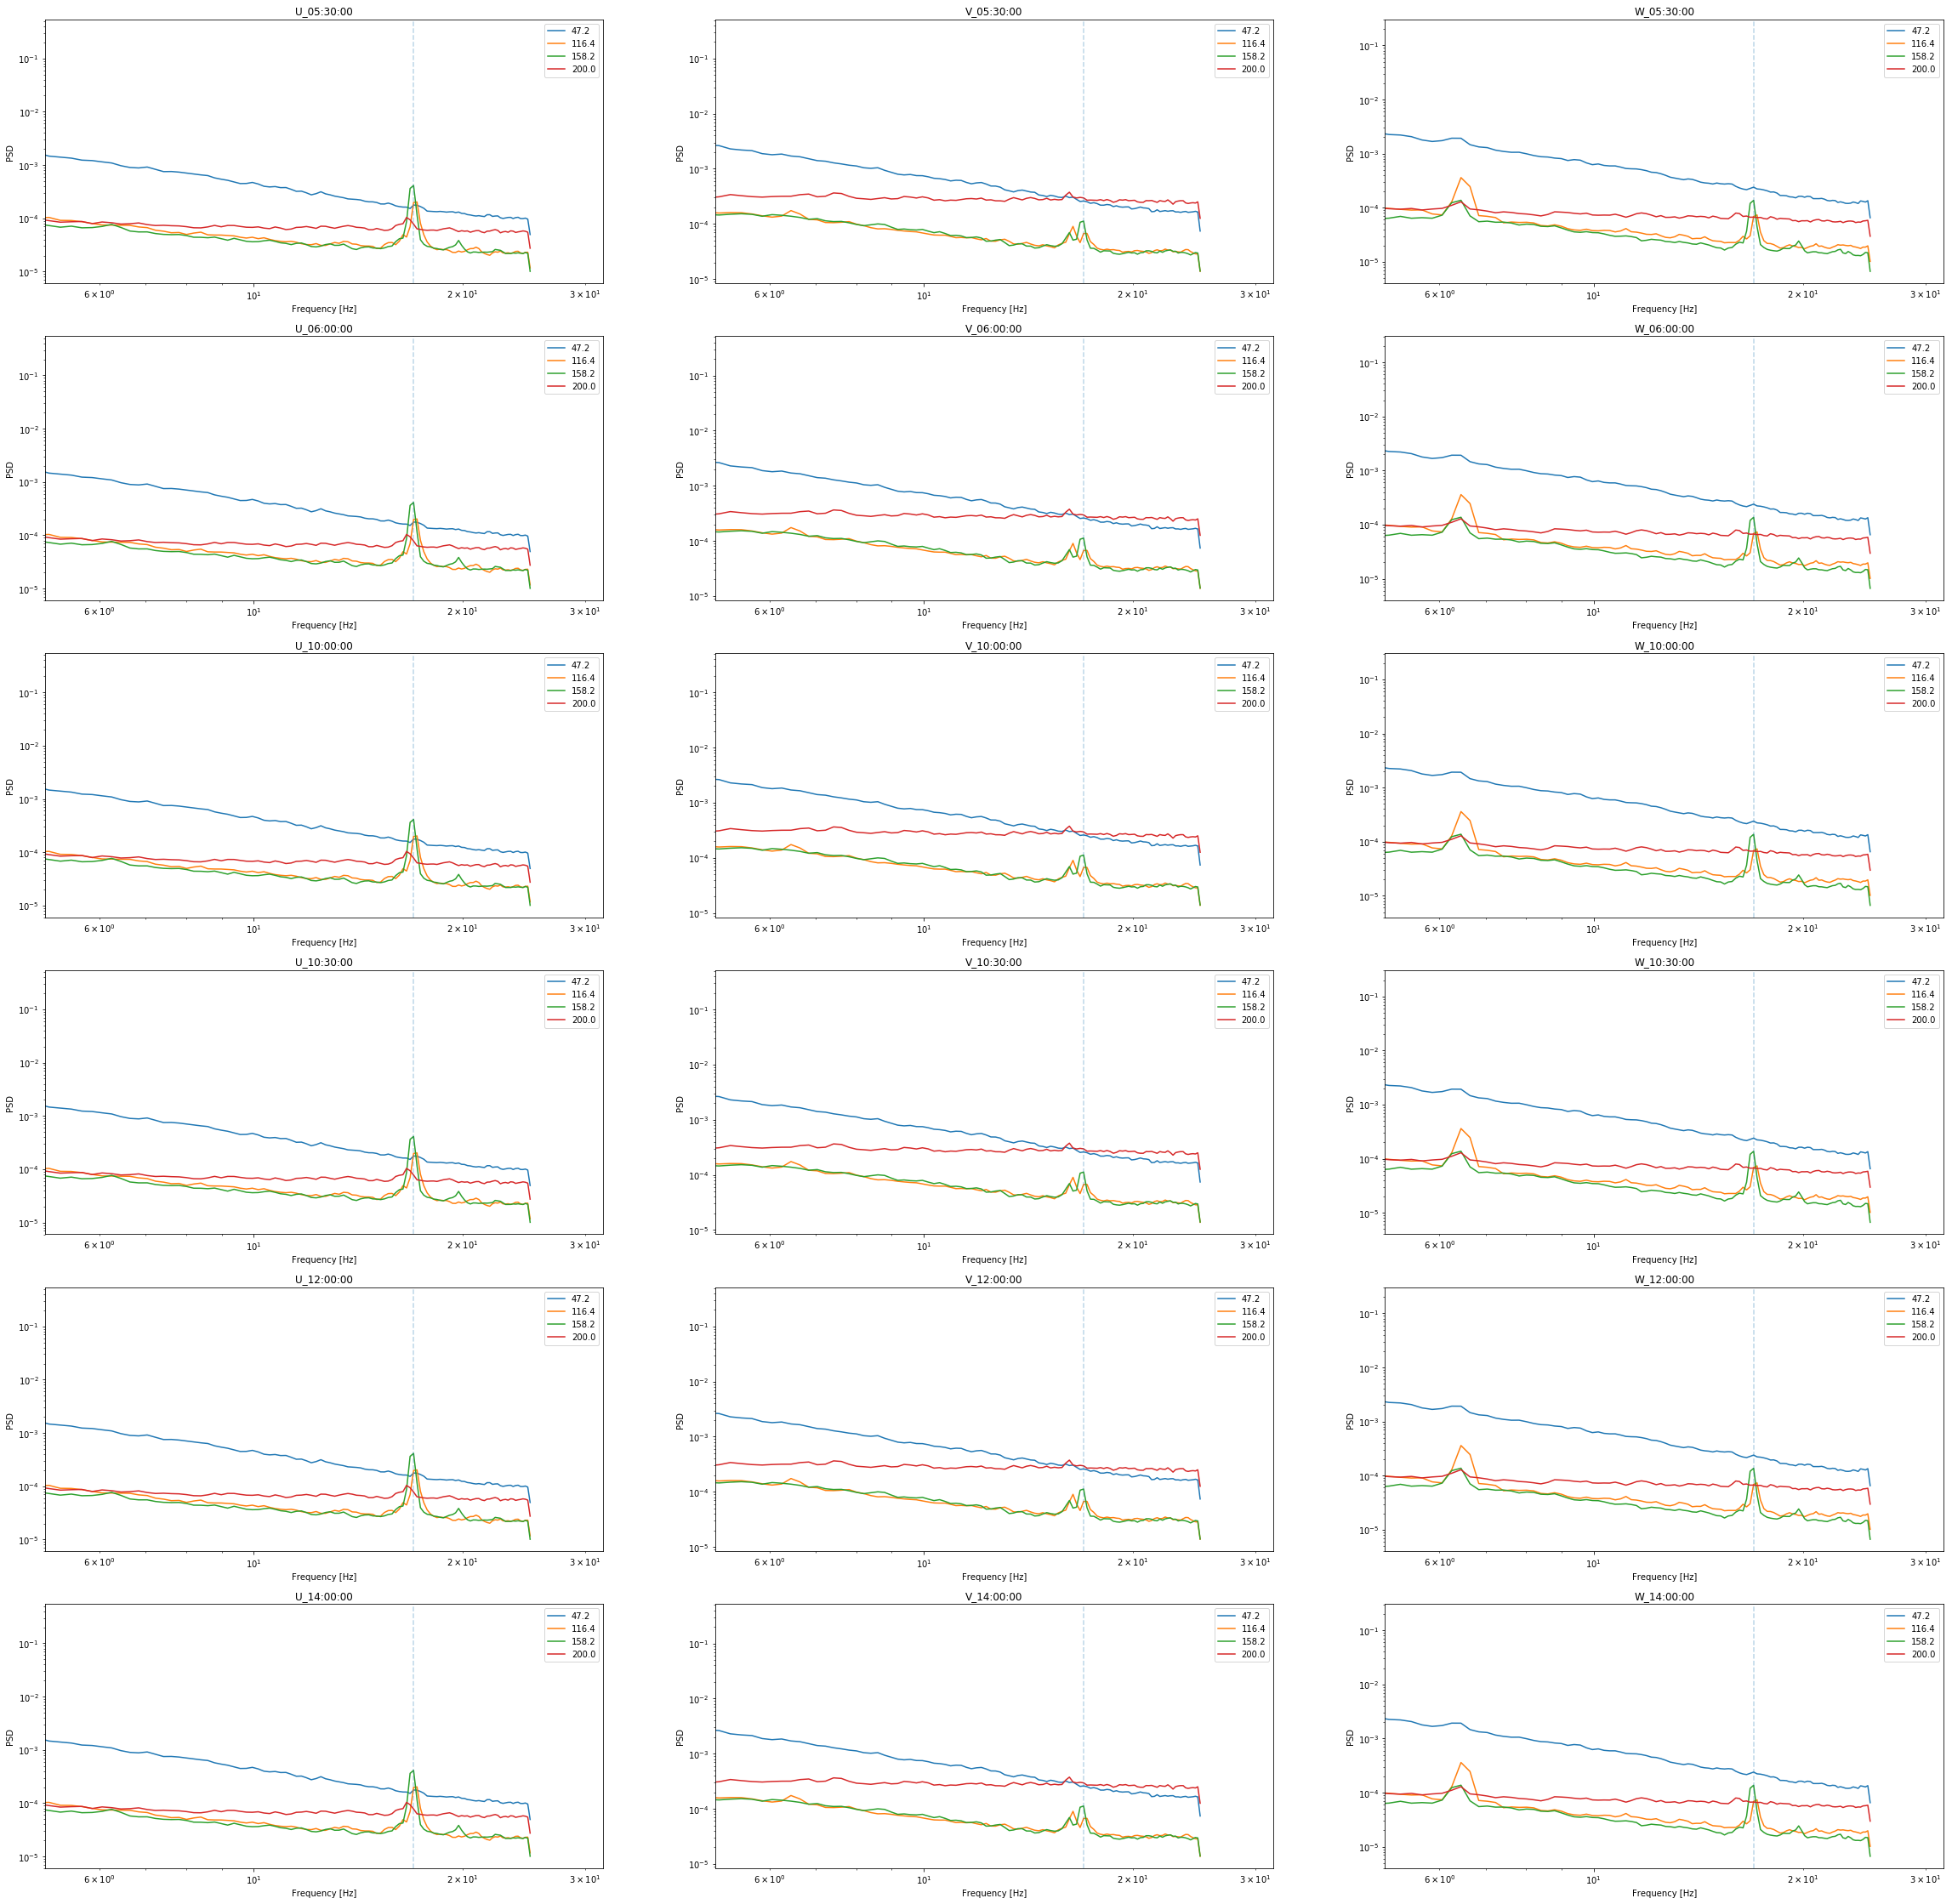

In [68]:
fig,ax = plt.subplots(len(times),len(vel_comps),figsize=(40,40))

i =0
j = 0
for vel_comp in vel_comps:
    i = 0
    for t in times:
        for h in heights:
            name = str(vel_comp)+str(h)+str(time)
            ax[i,j].loglog(freq[name],P[name], label =h)
            ax[i,j].set_xlim(left = 10**0.7)
            
        ax[i,j].set_xlabel("Frequency [Hz]")
        ax[i,j].set_ylabel("PSD")
        
        ax[i,j].axvline(x=17,linestyle = '--', alpha = 0.3)
        title = vel_comp + '_'
        title = title + t
        ax[i,j].set_title(title)
        ax[i,j].legend()
        i = i +1
    j = j +1
fig.savefig("../PSD_interesting.png",bbox_inches="tight",dpi=500)


## Compare BTS to SONIC data

------------------
Starting Master Function
group 1 out of 4
group 2 out of 4
group 3 out of 4
group 4 out of 4
Creating Final DataFrame
DONE!
------------------
------------------
Starting Master Function
group 1 out of 4
group 2 out of 4
group 3 out of 4
group 4 out of 4
Creating Final DataFrame
DONE!
------------------
Done!


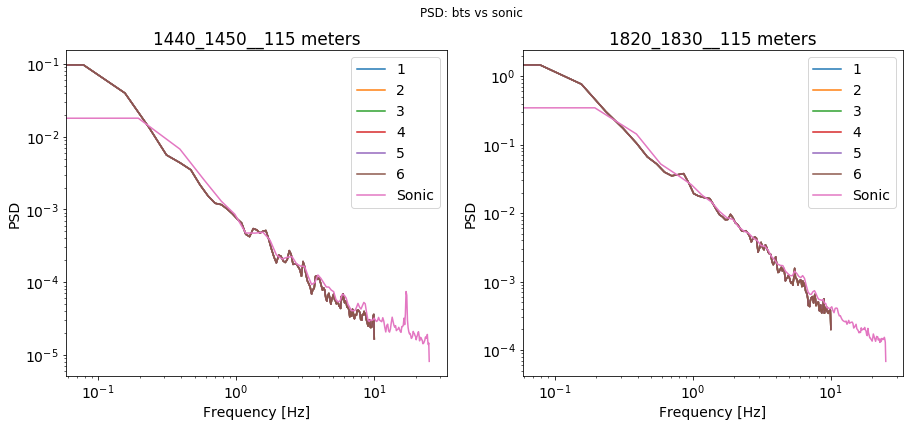

In [56]:
fig,ax = plt.subplots(1,2,figsize=(15,6))
fig.suptitle('PSD: bts vs sonic', fontsize=12)
j = 0 
k = 0
for per in np.array(['1440_1450','1820_1830']):
    
    for i in range(1,7):
        # Import BTS as a dataframe
        path_to_csv = 'C:/Users/krydalch/Desktop/TurbSim/csvs/{0}_rand{1}.csv'.format(per,i)
        df_bts  = pd.read_csv(path_to_csv)
        df_bts = df_bts.set_index('Unnamed: 0')
        df_bts.index.name = 'time (s)'
        heights = df_bts.keys()    
        
        for h in heights:
            if '115.0 meters_u' in h:
                series = df_bts[h]
                series = series - series.mean()
                # Hard Coded:!
                dt = 0.05
                fs = 1/dt
                timeseries = series.values

                [f_bts,P_bts]=welch(timeseries,fs=fs)
                
                ax[j].loglog(f_bts,P_bts, label =i)
                
                #ax[0,j].set_xlim(left = 10**0.7)
                ax[j].set_xlabel("Frequency [Hz]")
                ax[j].set_ylabel("PSD")
               # ax[j].
                
    ax[j].set_title(per + '__115 meters')
    
    j = j + 1 
#------ PLOT SONIC
path_to_sonic   = "C:\\Users\\krydalch\\Desktop\\MetMastData\\TTU tall tower\\"
#-- MIXED
start_time = '18:20:00'
end_time = '18:30:00'
master_df = f.get_sonic_met_dat(path_to_csvs, start_time ,end_time)
series = master_df[116.4]['U']
series = series - series.mean()
dt = np.unique(np.round(np.diff((series.index - series.index[0]).total_seconds()),2))[0]
fs = 1/dt
timeseries = series.values
[f_mixed,P_mixed]=welch(timeseries,fs=fs)
ax[1].loglog(f_mixed,P_mixed, label ='Sonic')

#-- LLJ
start_time = '14:40:00'
end_time = '14:50:00'
master_df = f.get_sonic_met_dat(path_to_csvs, start_time ,end_time)
series = master_df[116.4]['U']
series = series - series.mean()
dt = np.unique(np.round(np.diff((series.index - series.index[0]).total_seconds()),2))[0]
fs = 1/dt
timeseries = series.values
[f_LLJ,P_LLJ]=welch(timeseries,fs=fs)
ax[0].loglog(f_LLJ,P_LLJ, label ='Sonic')



ax[0].legend()
ax[1].legend()
print('Done!')
fig.savefig("../115_meter_PSD.png",bbox_inches="tight",dpi=500)

## Old Stuff

In [50]:
master_df.head()

0.9                                  \
                                     Theta         U         V         W   
2017-02-17 14:40:00+00:00        -5.208436  2.809337 -0.256087  0.120181   
2017-02-17 14:40:00.020000+00:00 -4.640218  2.632049 -0.213629  0.039769   
2017-02-17 14:40:00.040000+00:00 -4.361234  2.603663 -0.198569 -0.060068   
2017-02-17 14:40:00.060000+00:00 -2.729079  2.496284 -0.118992  0.121693   
2017-02-17 14:40:00.080000+00:00 -4.002820  2.472074 -0.172987  0.269674   

                                     2.4                                  \
                                     Theta         U         V         W   
2017-02-17 14:40:00+00:00        -3.024339  2.637810 -0.139365  0.721828   
2017-02-17 14:40:00.020000+00:00 -0.461159  2.668273 -0.021477  0.767372   
2017-02-17 14:40:00.040000+00:00 -0.912192  2.645323 -0.042119  0.805414   
2017-02-17 14:40:00.060000+00:00 -2.413501  2.770776 -0.116784  0.851096   
2017-02-17 14:40:00.080000+00:00  0.949219  2.846502  0.047162  0.670300   

                                     4.0              ...     116.4            \
                                     Theta         U  ...         V         W   
2017-02-17 14:40:00+00:00         2.933907  2.776930  ... -0.245900  0.139104   
2017-02-17 14:40:00.020000+00:00  0.910805  2.724549  ... -0.297943  0.134874   
2017-02-17 14:40:00.040000+00:00 -1.195136  2.851803  ... -0.298873  0.154827   
2017-02-17 14:40:00.060000+00:00 -3.410432  2.798444  ... -0.247295  0.169033   
2017-02-17 14:40:00.080000+00:00 -3.369497  2.767156  ... -0.299803  0.174780   

                                     158.2                                 \
                                     Theta          U         V         W   
2017-02-17 14:40:00+00:00        -2.085754  13.375277 -0.487119  0.123639   
2017-02-17 14:40:00.020000+00:00 -2.127492  13.400590 -0.497816  0.111606   
2017-02-17 14:40:00.040000+00:00 -2.261652  13.383230 -0.528554  0.152273   
2017-02-17 14:40:00.060000+00:00 -2.285932  13.399037 -0.534866  0.191135   
2017-02-17 14:40:00.080000+00:00 -2.322391  13.400709 -0.543474  0.160753   

                                     200.0                                 
                                     Theta          U         V         W  
2017-02-17 14:40:00+00:00        -0.303497  12.928363 -0.068482  0.181516  
2017-02-17 14:40:00.020000+00:00 -0.047372  12.972235 -0.010725  0.169713  
2017-02-17 14:40:00.040000+00:00 -0.397568  12.978442 -0.090057  0.118061  
2017-02-17 14:40:00.060000+00:00 -0.254576  12.953590 -0.057556  0.100004  
2017-02-17 14:40:00.080000+00:00 -0.163138  12.912051 -0.036765  0.072760  

[5 rows x 36 columns]

In [57]:
series = master_df[116.4]['U']
series = series - series.mean()
dt = np.unique(np.round(np.diff((series.index - series.index[0]).total_seconds()),2))[0]
fs = 1/dt
timeseries = series.values

[f_mixed,P_mixed]=welch(timeseries,fs=fs)

In [62]:
series.index[1] - series.index[0]

Timedelta('0 days 00:00:00.020000')

In [6]:
df_bts.head()

,Unnamed: 0,5.0 meters_u,5.0 meters_v,5.0 meters_w,10.0 meters_u,10.0 meters_v,10.0 meters_w,15.0 meters_u,15.0 meters_v,15.0 meters_w,...,210.0 meters_w,215.0 meters_u,215.0 meters_v,215.0 meters_w,220.0 meters_u,220.0 meters_v,220.0 meters_w,225.0 meters_u,225.0 meters_v,225.0 meters_w
0,0.00,6.019488,-0.107836,0.352614,6.113136,-0.175176,0.365042,5.933901,-0.194316,0.243979,...,-0.016400,11.737666,2.251088,-0.026966,11.615375,2.142922,-0.081080,11.290180,2.042395,-0.009763
1,0.05,6.053448,-0.043393,0.415127,6.110563,-0.122937,0.376861,5.928584,-0.189487,0.201243,...,0.005544,11.725831,2.292440,-0.056258,11.583987,2.119480,-0.129438,11.319853,2.044941,0.010081
2,0.10,6.053620,-0.128556,0.433143,6.064768,-0.164552,0.384480,5.933901,-0.177371,0.219394,...,-0.019787,11.710223,2.241957,-0.058459,11.621893,2.074441,-0.079353,11.302186,2.071280,0.018954
3,0.15,6.057050,-0.219162,0.437816,6.086036,-0.203885,0.423695,5.939561,-0.194052,0.253393,...,-0.021683,11.715369,2.322730,-0.053820,11.656367,2.106574,-0.074680,11.303044,2.012193,-0.006952
4,0.20,6.036296,-0.176054,0.460979,6.051390,-0.224693,0.390508,5.996848,-0.177810,0.218683,...,-0.037768,11.705078,2.333792,-0.014842,11.686040,2.134055,-0.042475,11.289666,2.050297,-0.022530


In [ ]:
fig = plt.figure(figsize=(7,7))
ax  = fig.add_subplot(111)


ax.loglog(f_mixed,P_mixed,'-k', label = 'mixed')
ax.loglog(f_LLJ,P_LLJ,'-g', label = 'LLJ')
ax.set_xlabel("Frequency [Hz]")
ax.set_ylabel("PSD")
ax.axvline(x=17,linestyle = '--')
#ax.title('PSD')
ax.legend()
fig.savefig("../PSD.png",bbox_inches="tight",dpi=500)

In [ ]:
path_to_csvs   = "C:\\Users\\krydalch\\Desktop\\MetMastData\\TTU tall tower\\"
start_time = '13:20:00'
end_time = '18:30:00'
master_df = f.get_sonic_met_dat(path_to_csvs, start_time ,end_time)

series = master_df[116.4]['U']
series = series - series.mean()
dt = np.unique(np.round(np.diff((series.index - series.index[0]).total_seconds()),2))[0]
fs = 1/dt
timeseries = series.values

[f_mixed,P_mixed]=welch(timeseries,fs=fs)

In [ ]:
path_to_csvs   = "C:\\Users\\krydalch\\Desktop\\MetMastData\\TTU tall tower\\"
start_time = '14:40:00'
end_time = '14:50:00'
master_df = f.get_sonic_met_dat(path_to_csvs, start_time ,end_time)

series = master_df[116.4]['U']
series = series - series.mean()
dt = np.unique(np.round(np.diff((series.index - series.index[0]).total_seconds()),2))[0]
fs = 1/dt
timeseries = series.values

[f_LLJ,P_LLJ]=welch(timeseries,fs=fs)



In [ ]:
fig = plt.figure(figsize=(7,7))
ax  = fig.add_subplot(111)
ax.loglog(f_mixed,P_mixed,'-k', label = 'mixed')
ax.loglog(f_LLJ,P_LLJ,'-g', label = 'LLJ')
ax.set_xlabel("Frequency [Hz]")
ax.set_ylabel("PSD")
ax.axvline(x=17,linestyle = '--')
#ax.title('PSD')
ax.legend()
fig.savefig("../PSD.png",bbox_inches="tight",dpi=500)

In [ ]:
1/50.